<a href="https://colab.research.google.com/github/practice-grounds-wpaarth24/Machine_Learning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import plotly.express as px
import pandas as pd

In [ ]:
dataset = pd.read_csv("/content/healthinsurance.csv")
dataset.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [ ]:
fig = px.histogram(dataset, x="age", y="claim", color_discrete_sequence=['green'])
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
fig = px.histogram(dataset, x="age", marginal="box",color='smoker', color_discrete_sequence=['green','grey'])
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
dataset.smoker.value_counts()

smoker
0    12028
1     2972
Name: count, dtype: int64

In [ ]:
fig=px.scatter(dataset, x='bmi', y='claim',hover_data=['sex','diabetes'],opacity=0.8)
#fig.update_traces(marker_size=5)
fig.show()

#**Correlation Coefficient**

In [ ]:
dataset.claim.corr(dataset.age)

0.30115798300331115

<Axes: >

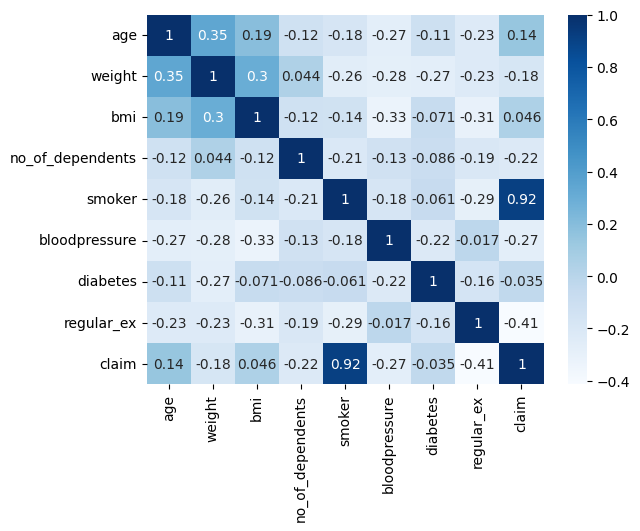

In [ ]:
import seaborn as sns
numerical_data = dataset.select_dtypes(include=['float', 'int'])
corr_matrix = numerical_data.corr()

sns.heatmap(corr_matrix.corr(),cmap='Blues', annot=True)

In [ ]:
dataset = dataset.dropna()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset[['age','smoker','bmi']],dataset.claim, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [ ]:
predictions=regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error as rmse

non_smoker = dataset[dataset.smoker == 0]
inputs, targets = non_smoker[['bmi']], non_smoker.claim

model = LinearRegression()
model.fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("loss: ",loss)

loss:  38780005.63680932


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

ValueError: Found input variables with inconsistent numbers of samples: [2730, 10944]

In [ ]:
sns.barplot(data = dataset, x = 'smoker', y = 'claim')

#**OneHotEncoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder()
enc.fit(dataset[['city']])
enc.categories_

In [ ]:
coder = enc.transform(dataset[['city']]).toarray()
coder

#**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataset[['bmi', 'smoker', 'age']])


In [ ]:
scaler.mean_

In [ ]:
scaled_inputs = scaler.transform(dataset[['bmi', 'smoker', 'age']])
scaled_inputs

array([[-0.9761792 , -0.49706742,  1.45391385],
       [-1.25335022, -0.49706742,  0.6704579 ],
       [-2.03595076,  2.01179951, -0.54033766],
       ...,
       [ 0.49119681, -0.49706742, -1.39501688],
       [ 1.04553885, -0.49706742,  0.8841277 ],
       [-0.63379146, -0.49706742,  0.8841277 ]])